In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)

In [20]:
df1 = pd.read_csv("C:/Users/User/Documents/UNI/3rd year/semester 2/ML/Final Project/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [21]:
df1.shape

(13320, 9)

In [22]:
# Check for 0 values in each column
zero_values = (df1 == 0).any()

# Display columns with 0 values
print(df1.columns[zero_values])

#balcony can have zero

Index(['balcony'], dtype='object')


In [23]:
# Remove duplicate records
df1 = df1.drop_duplicates()

df1.shape

#529 records are removed

(12791, 9)

In [6]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
area_type_freq=df1['area_type'].value_counts()
print(area_type_freq)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


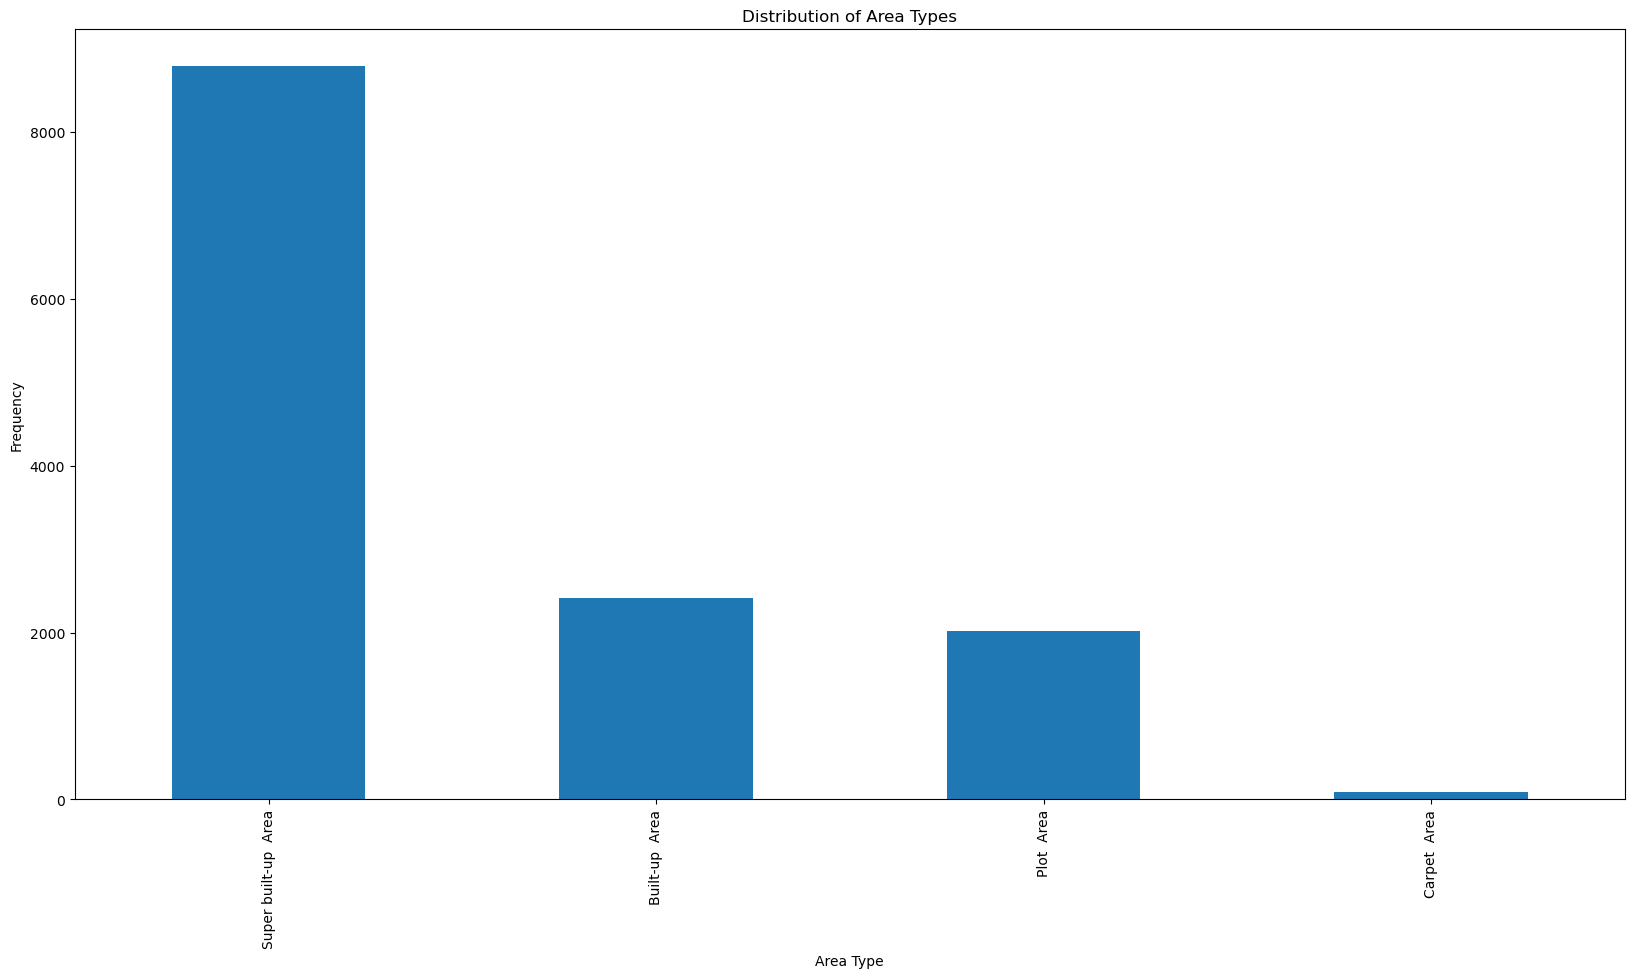

In [8]:
#EDA
#Area Type
area_type_freq.plot(kind='bar')
plt.title('Distribution of Area Types')
plt.xlabel('Area Type')
plt.ylabel('Frequency')
plt.show()

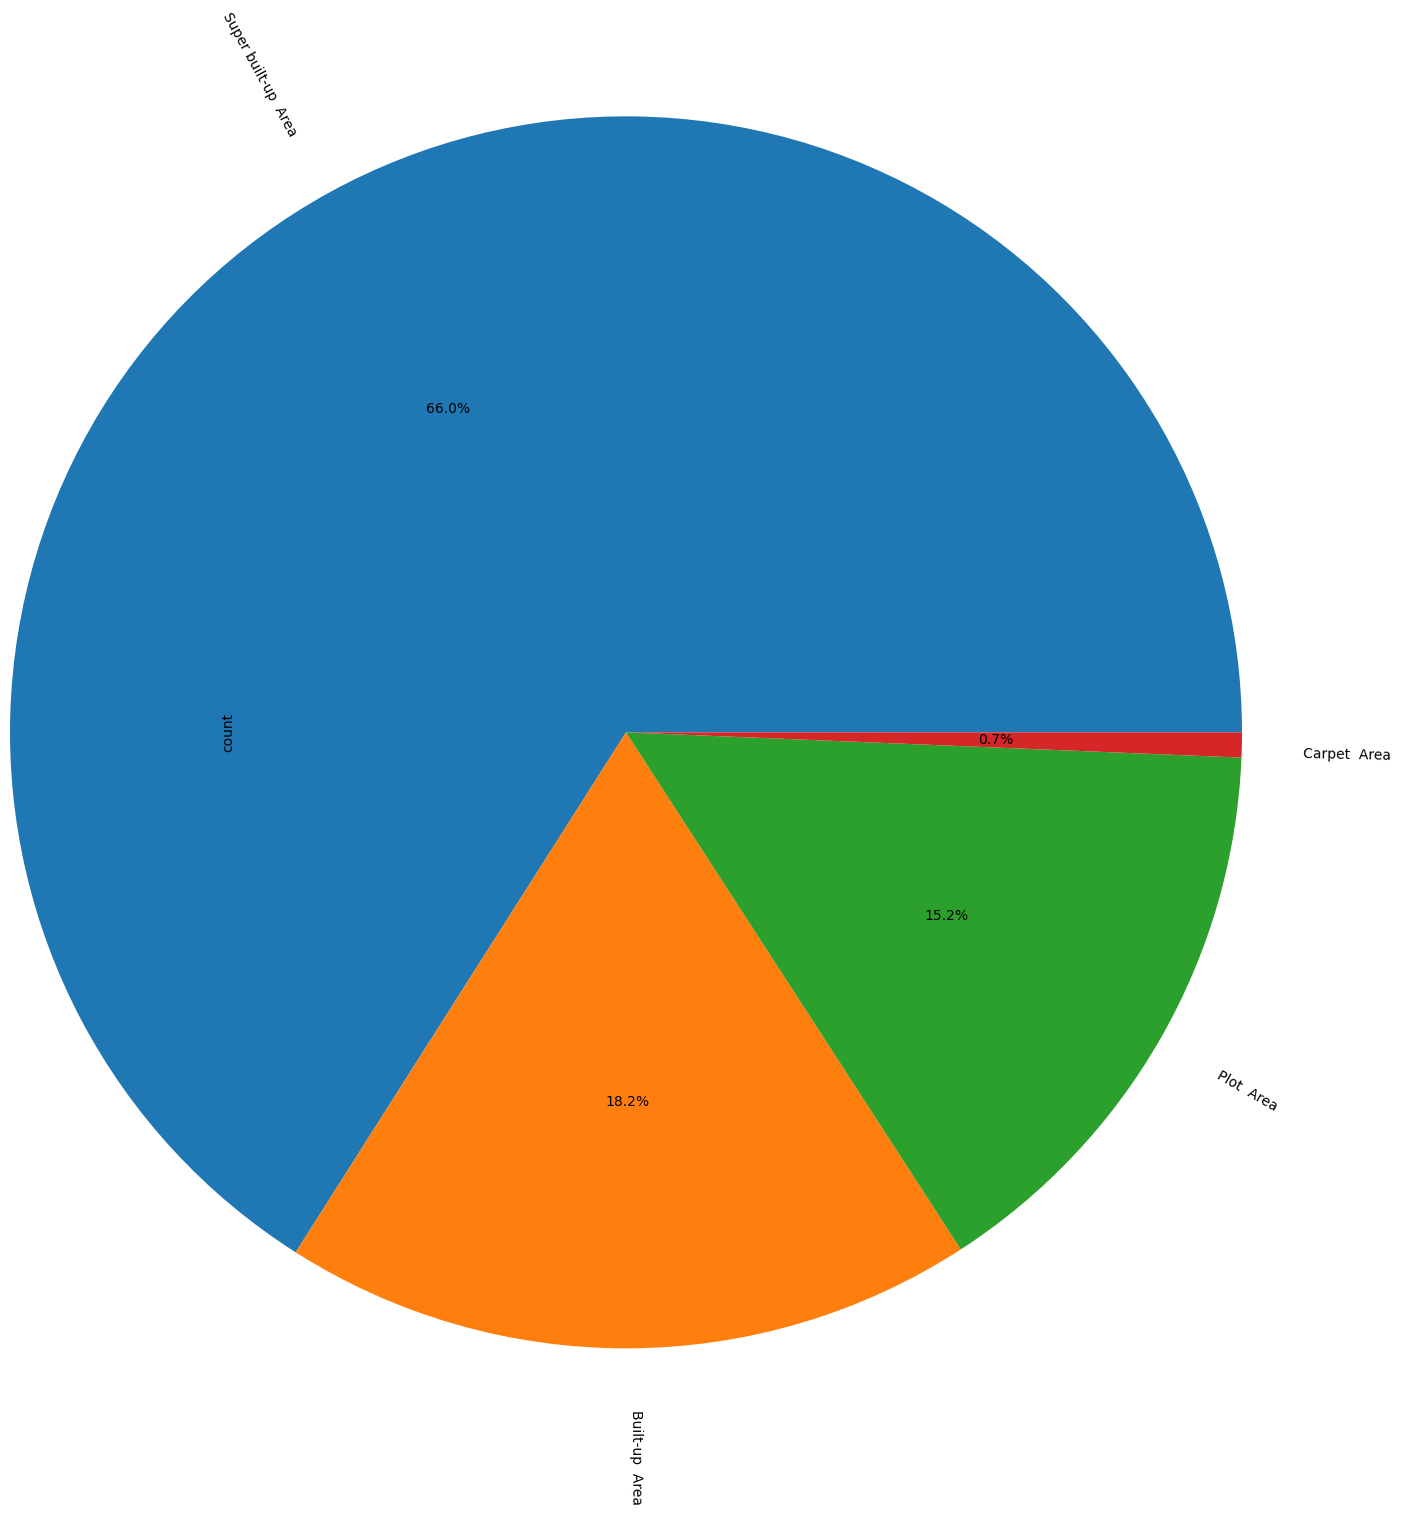

In [9]:
#Area Type
area_type_freq.plot.pie(
    autopct="%.1f%%",   # Display percentage values with one decimal place
    rotatelabels=True,  # Rotate labels to improve readability
    wedgeprops={'linewidth': 6},  # Set the width of the wedge outlines
    radius=2            # Increase the radius of the pie chart
)
plt.show()

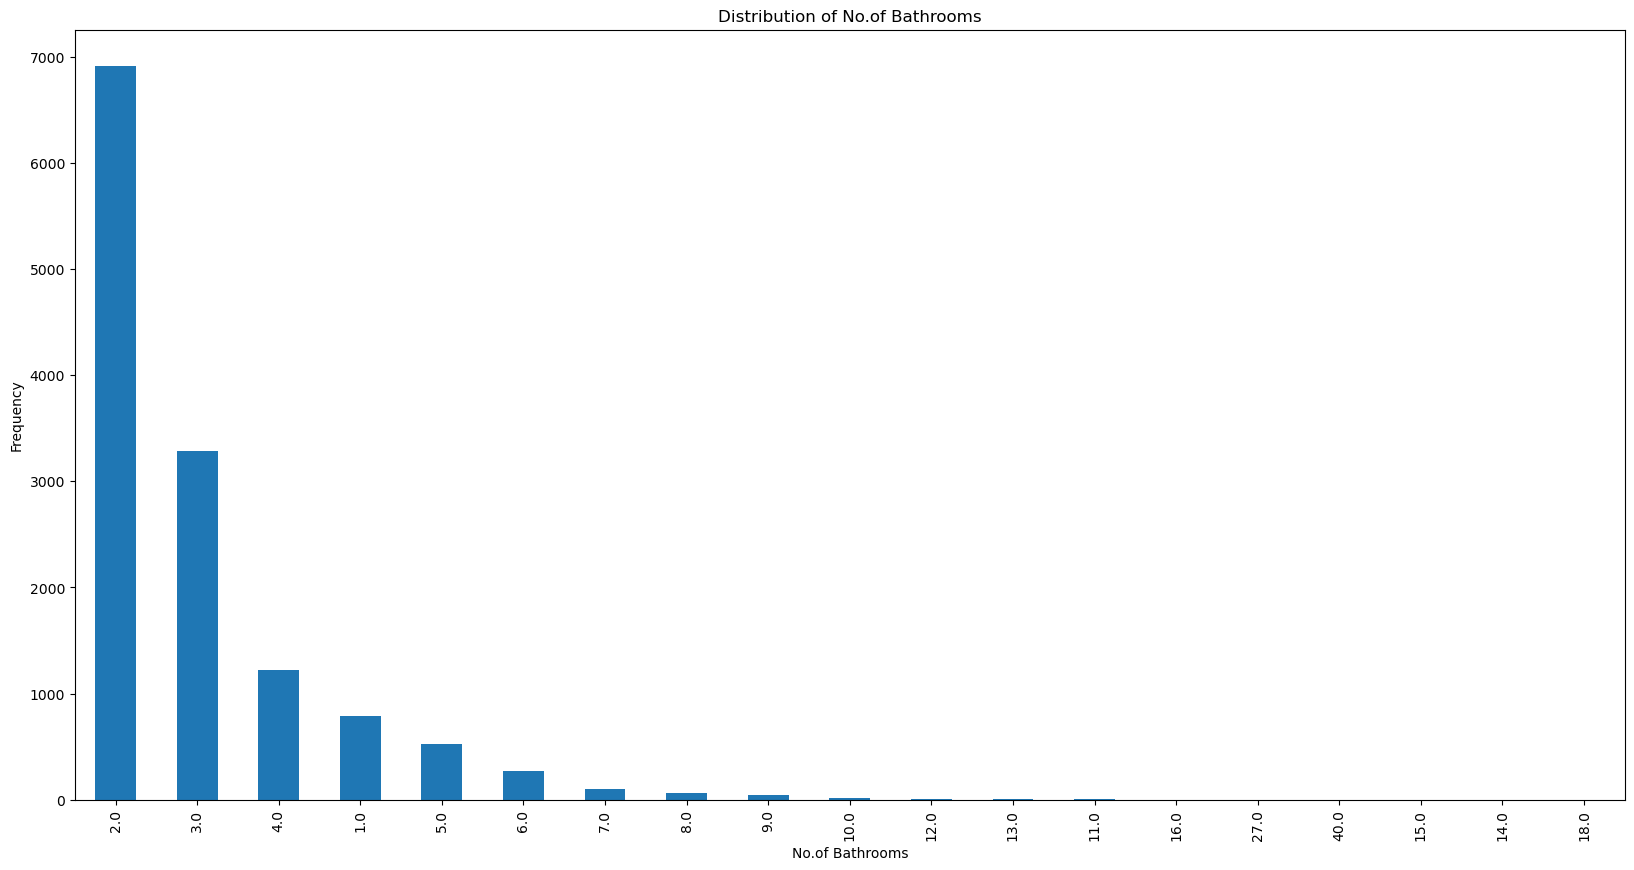

In [10]:
#Bath
bath_freq=df1.bath.value_counts()
bath_freq.plot(kind='bar')
plt.title('Distribution of No.of Bathrooms')
plt.xlabel('No.of Bathrooms')
plt.ylabel('Frequency')
plt.show()

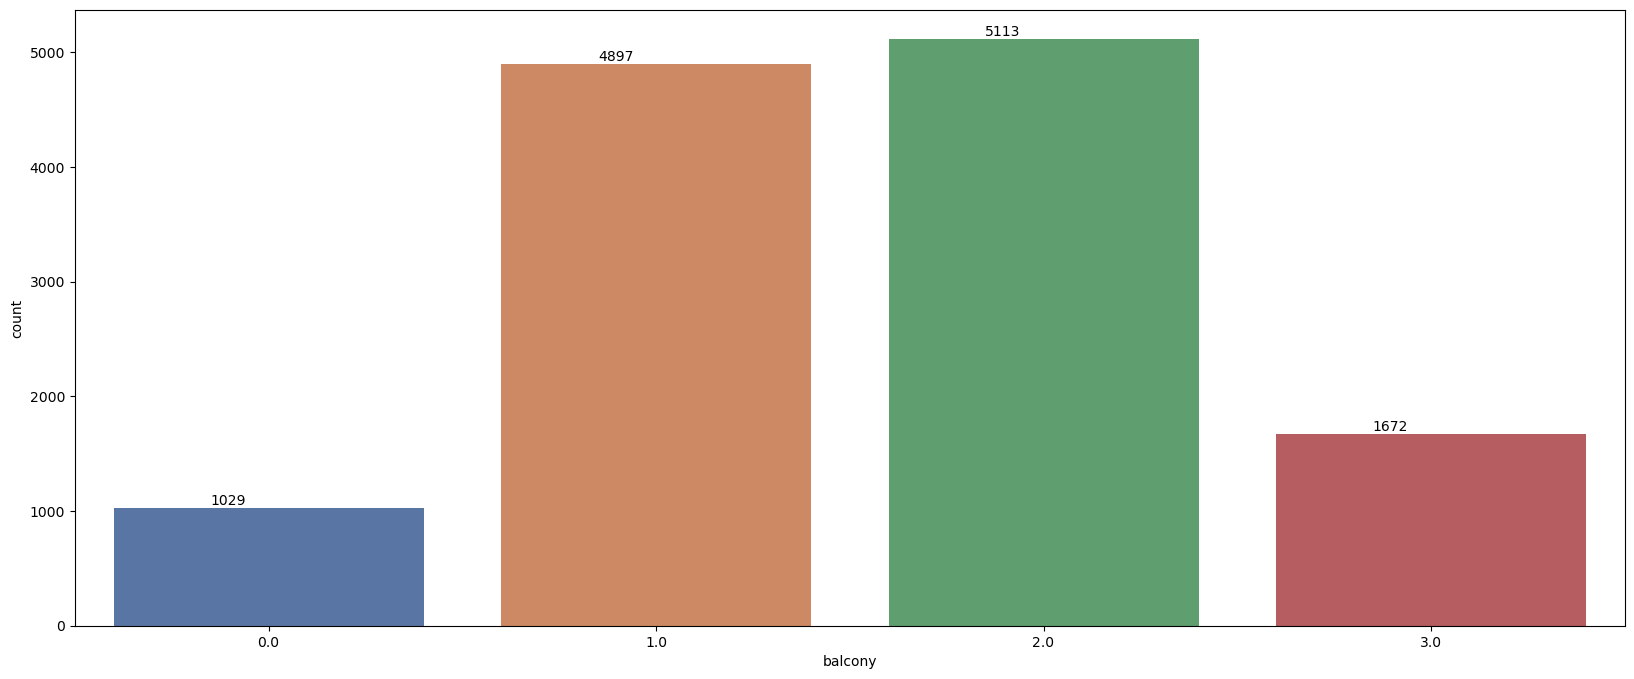

In [11]:
#Balcony
# Specify color palette
colors = sns.color_palette('deep', n_colors=len(df1['balcony'].unique()))

# Set figure size
plt.figure(figsize=(20, 8))

ax = sns.countplot(x='balcony', data=df1, palette=colors)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color='black')

# Show the plot
plt.show()

In [12]:
#SIZE
df1['size'].unique()
#1 BHK: One bedroom, one hall (living room), and one kitchen.
#2 BHK: Two bedrooms, one hall (living room), and one kitchen.
#3 BHK: Three bedrooms, one hall (living room), and one kitchen.

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
#Removing 16 missing values in size
df1.dropna(subset=['size'], inplace=True)
#Create new variable bedroom to indicate number of bedroom
df1['bedroom'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.bedroom.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df1.drop('size', axis=1, inplace=True)

In [16]:
df1.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2


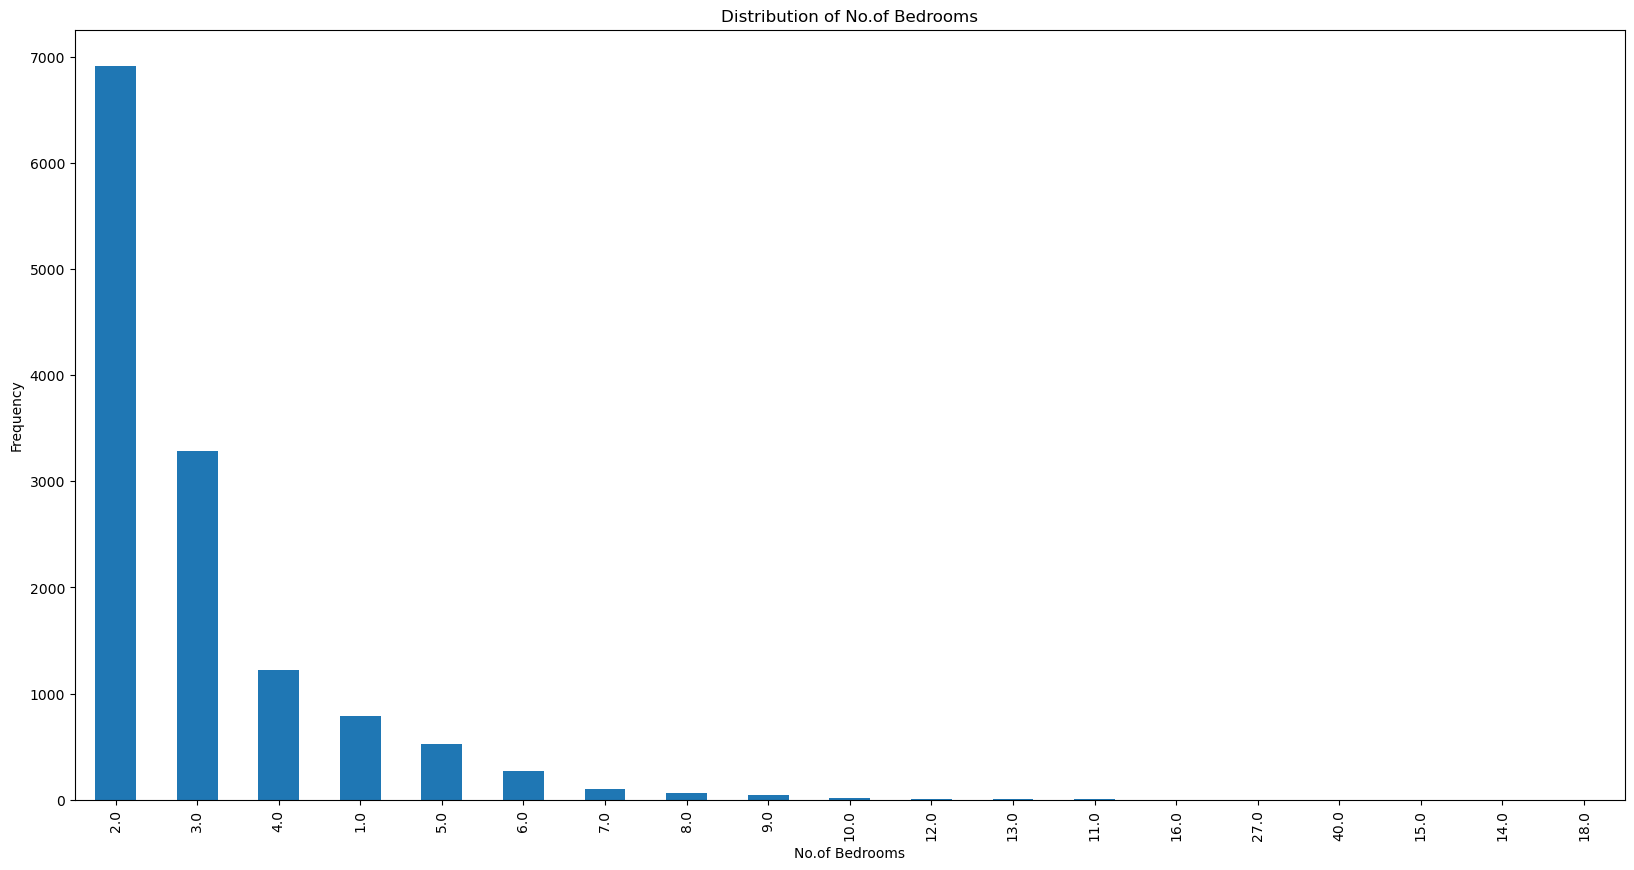

In [17]:
#Bedroom
bedroom_freq=df1.bedroom.value_counts()
bath_freq.plot(kind='bar')
plt.title('Distribution of No.of Bedrooms')
plt.xlabel('No.of Bedrooms')
plt.ylabel('Frequency')
plt.show()

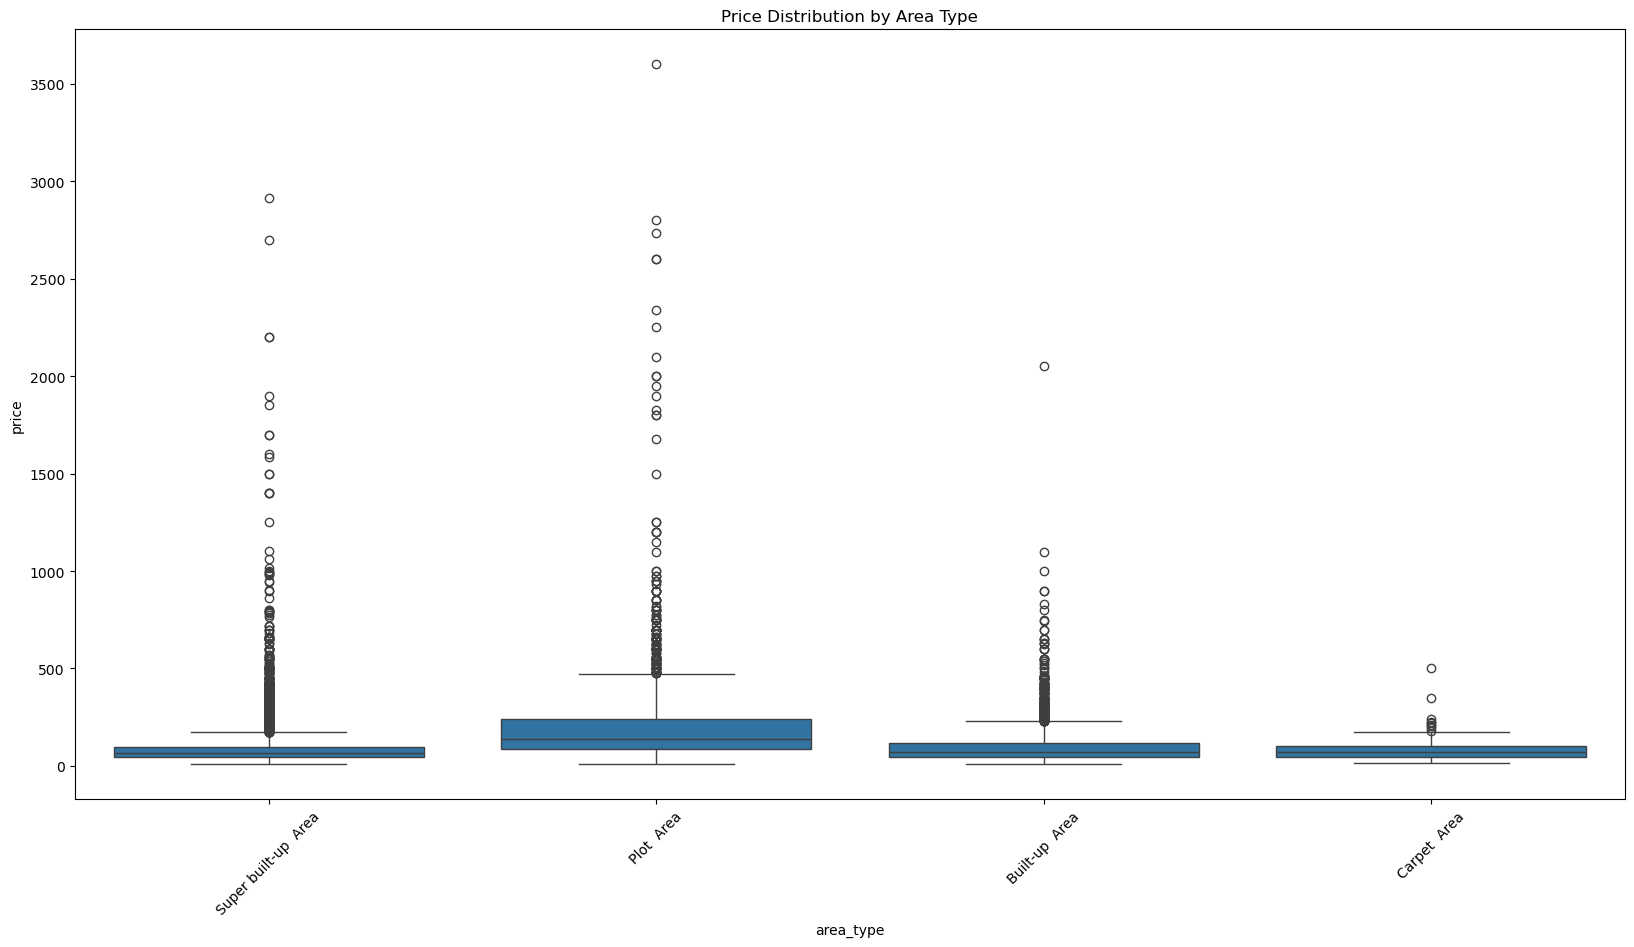

In [18]:
#Price VS Area_type 
sns.boxplot(x='area_type', y='price', data=df1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title
plt.title('Price Distribution by Area Type')

# Show the plot
plt.show()

#Plot Area: The entire piece of land the house sits on
#Super Built-Up Area: Includes hallways, elevators, staircases, amenities (gyms, pools) that the entire building uses.(includes Built-Up Area)
#Built-up Area: Total area covered by the house structure itself (includes carpet area)
#Carpet Area: This is essentially the usable floor area  inside the house.

#Using this variable to predict price is not useful since generally people are not specifically looking at the price 
#of these different areas as when they buy they are usually paying for the square feet of 
#area and not for types of area

#Hence we can consider removing Area Type

In [19]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

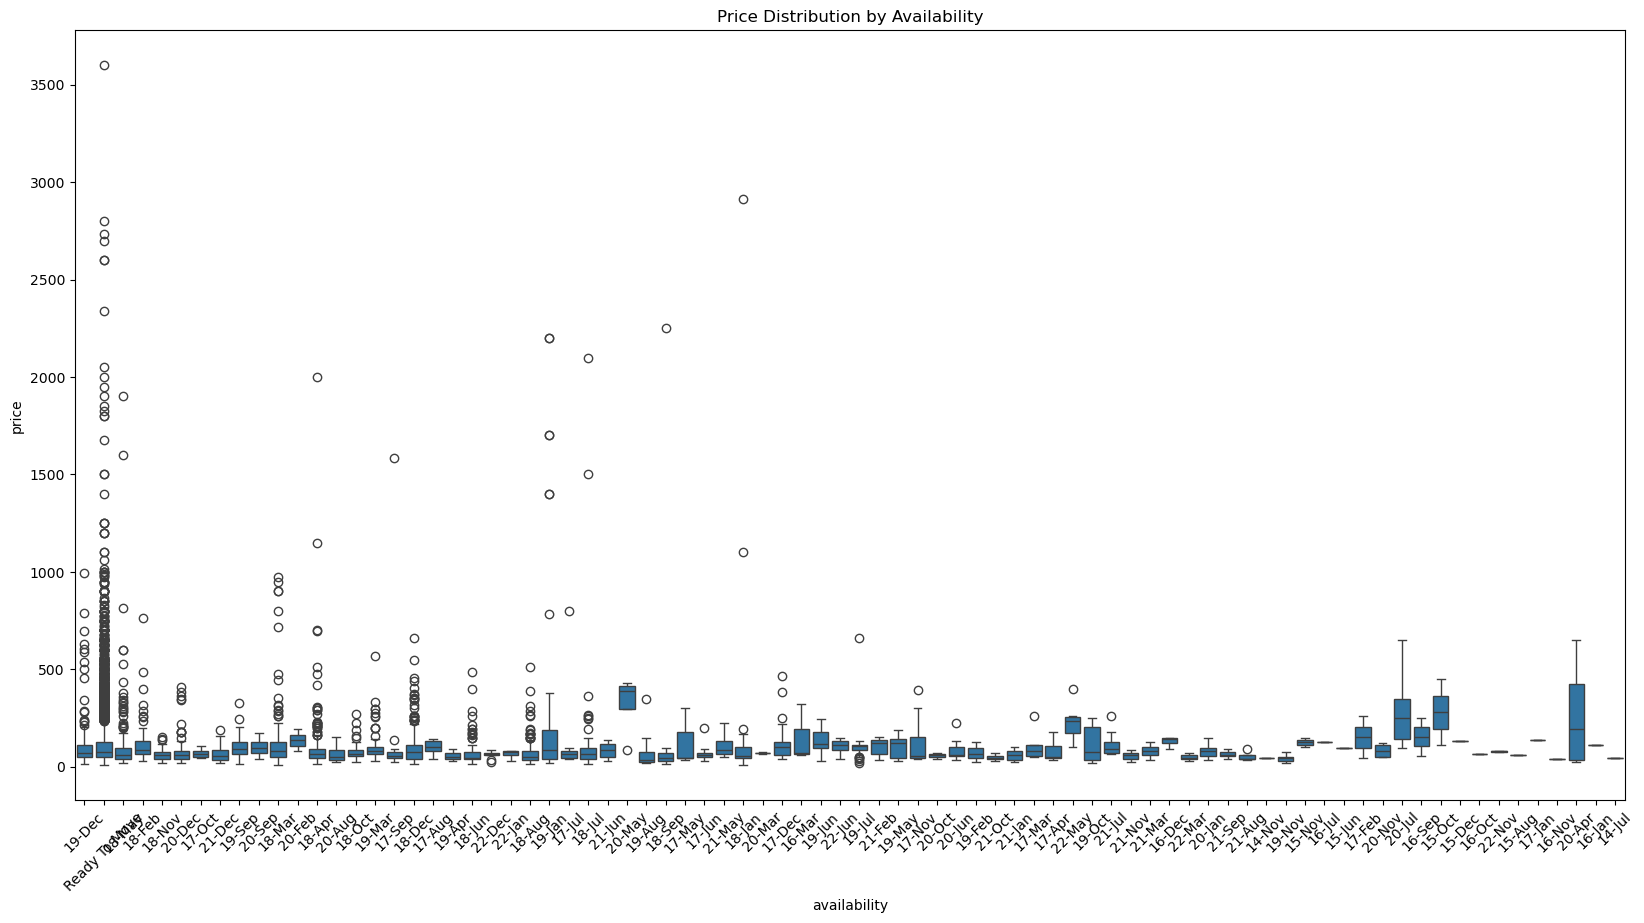

In [20]:
#Price VS availability
sns.boxplot(x='availability', y='price', data=df1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title
plt.title('Price Distribution by Availability')

# Show the plot
plt.show()

In [21]:
#availability doesn't provide much information as we don't know the year. Hence can be removed
df1.drop('availability', axis=1, inplace=True)

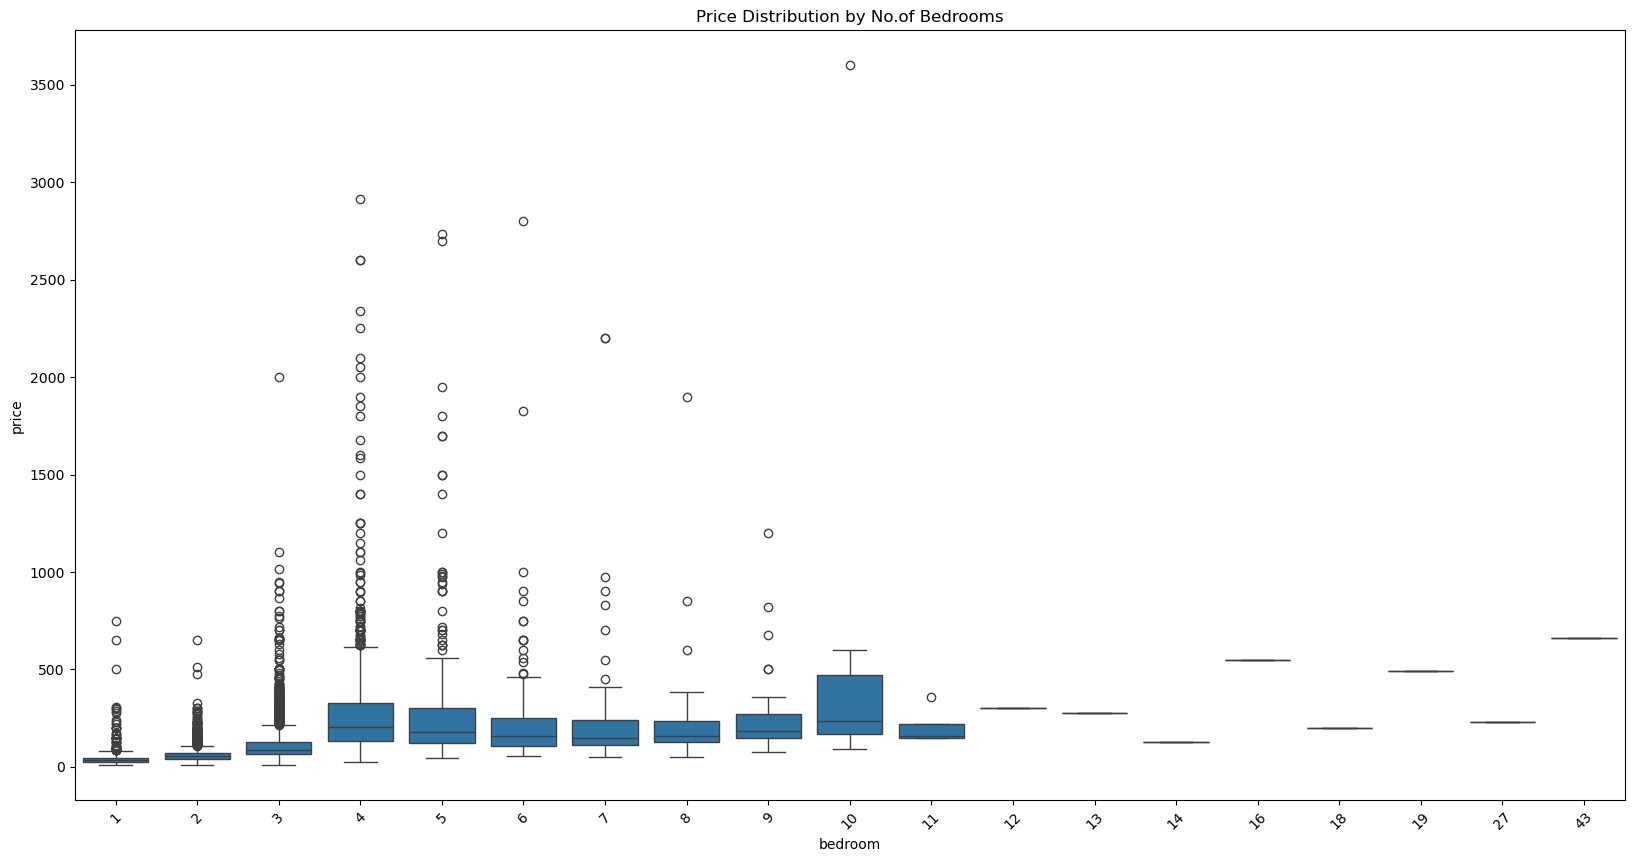

In [22]:
#Price VS Bedroom
sns.boxplot(x='bedroom', y='price', data=df1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title
plt.title('Price Distribution by No.of Bedrooms')

# Show the plot
plt.show()

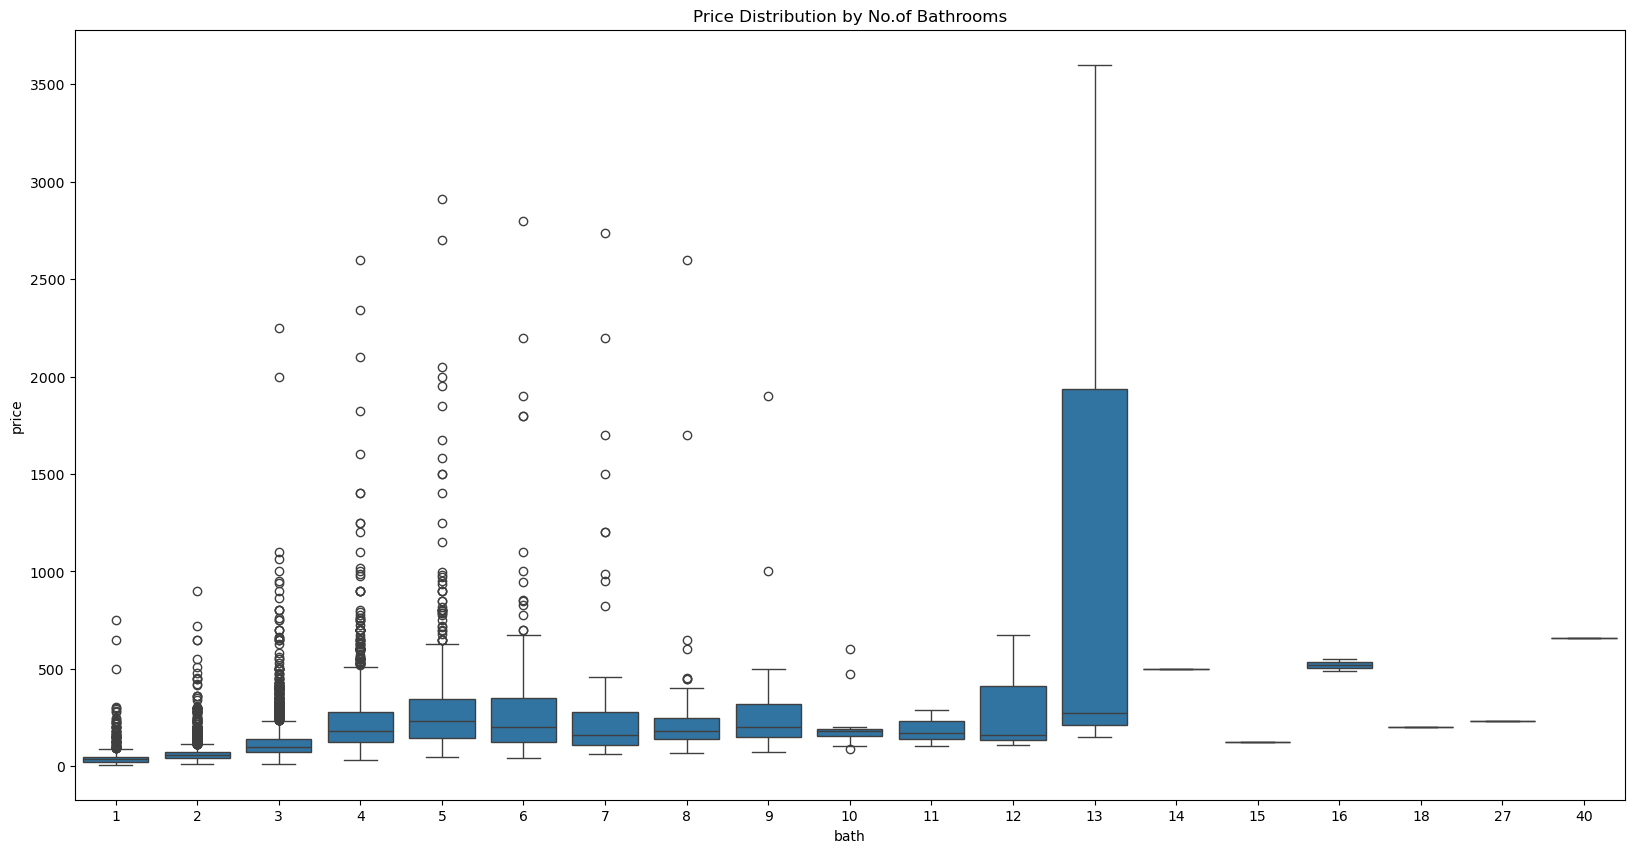

In [23]:
#Removing 73 missing values since 73 out of 13320 is only 0.5%
df1.dropna(subset=['bath'], inplace=True)

df1['bath'] = df1['bath'].astype(int)
#Price VS Balcony
sns.boxplot(x='bath', y='price', data=df1)

# Set plot title
plt.title('Price Distribution by No.of Bathrooms')

# Show the plot
plt.show()

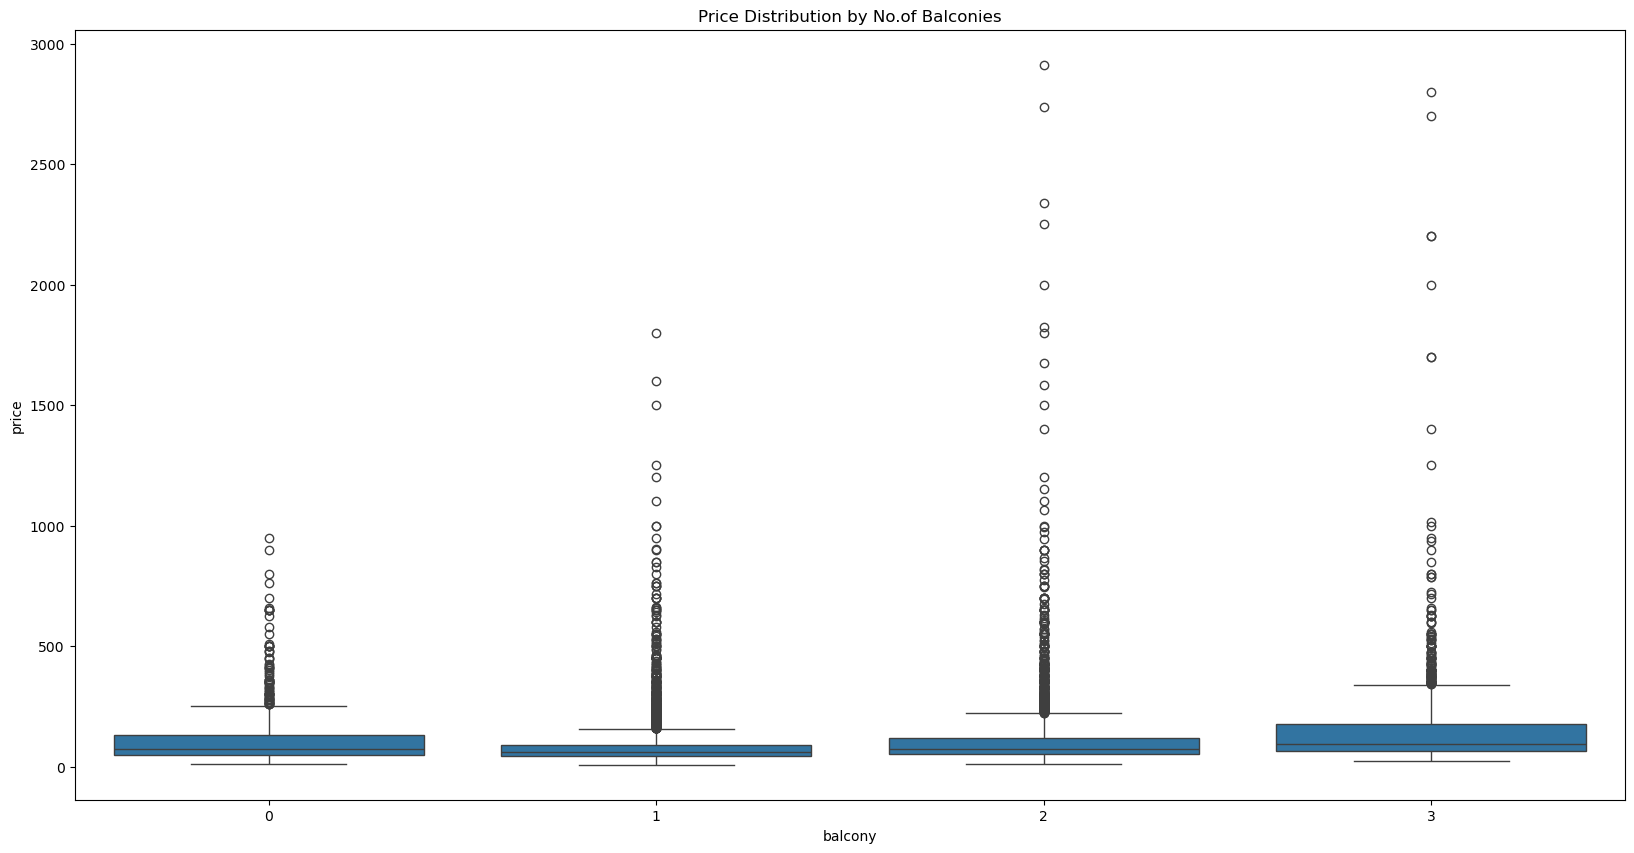

In [24]:
#Removing 609 missing values since 609 out of 13320 is only 4.5%
df1.dropna(subset=['balcony'], inplace=True)

df1['balcony'] = df1['balcony'].astype(int)
#Price VS Balcony
sns.boxplot(x='balcony', y='price', data=df1)


# Set plot title
plt.title('Price Distribution by No.of Balconies')

# Show the plot
plt.show()

In [25]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
def convert_to_sqft(total_sqft):
    try:
        # First, check if the value is a range
        if '-' in total_sqft:
            range_values = total_sqft.split('-')
            avg_sqft = (float(range_values[0]) + float(range_values[1])) / 2
            return avg_sqft
        # If the value contains 'Sq. Yards', convert to square feet (1 Sq. Yard = 9 Sq. Feet)
        elif 'Sq. Yards' in total_sqft:
            return float(total_sqft.split('Sq. Yards')[0]) * 9
        # If the value contains 'Grounds', convert to square feet (1 Grounds = 2400 Sq. Feet)
        elif 'Grounds' in total_sqft:
            return float(total_sqft.split('Grounds')[0]) * 2400
        # If the value contains 'Guntha', convert to square feet (1 Guntha = 1089 Sq. Feet)
        elif 'Guntha' in total_sqft:
            return float(total_sqft.split('Guntha')[0]) * 1089
        # If the value contains 'Acres', convert to square feet (1 Acres = 43560 Sq. Feet)
        elif 'Acres' in total_sqft:
            return float(total_sqft.split('Acres')[0]) * 43560
        # If the value contains 'Sq. Meter', convert to square feet (1 Sq. Meter = 10.764 Sq. Feet)
        elif 'Sq. Meter' in total_sqft:
            return float(total_sqft.split('Sq. Meter')[0]) * 10.764
        else:
            return float(total_sqft)
    except:
        return np.nan  # return NaN for invalid values


In [27]:
# Define a function to round numbers to two decimal places without scientific notation
def round_to_two_decimal_places(x):
    return round(x, 2)

# Apply the conversion function to the 'total_sqft' column
df1['total_sqft'] = df1['total_sqft'].apply(convert_to_sqft)

# Round the converted values to two decimal places
df1['total_sqft'] = df1['total_sqft'].apply(round_to_two_decimal_places)

# Print unique values after conversion
print("Unique values in 'total_sqft' after conversion:")
print(df1['total_sqft'].unique())

Unique values in 'total_sqft' after conversion:
[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


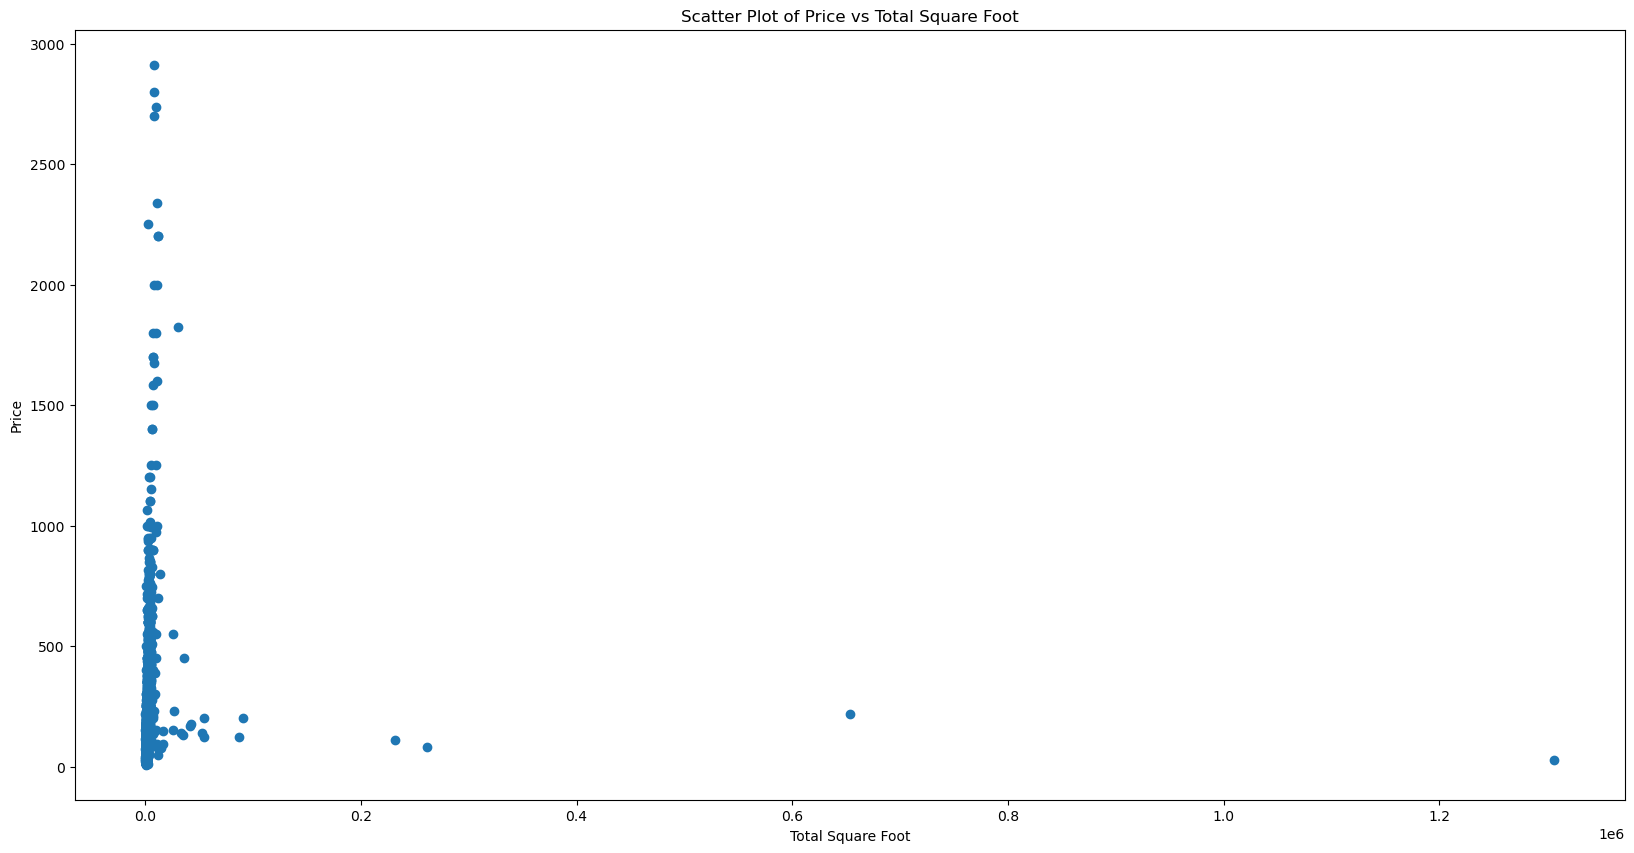

In [28]:
plt.scatter(df1['total_sqft'], df1['price'])
plt.xlabel('Total Square Foot')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Total Square Foot')
plt.show()

In [29]:
df1.isnull().sum()

area_type        0
location         1
society       5214
total_sqft       2
bath             0
balcony          0
price            0
bedroom          0
dtype: int64

In [30]:
df1['society'].unique()
#Doesn't make sense and hence can be removed
df1.drop('society', axis=1, inplace=True)

In [31]:
#Location

#1 missing value
df1.dropna(subset=['location'], inplace=True)

In [32]:
unique_locations = df1['location'].unique()
num_unique_locations = len(unique_locations)
print("Number of unique locations:", num_unique_locations)
print("Unique locations:", unique_locations)

Number of unique locations: 1265
Unique locations: ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [33]:
#cleaning of locations

# Remove leading and trailing whitespaces
df1['location'] = df1['location'].str.strip()

# Convert text to lowercase
df1['location'] = df1['location'].str.lower()

# Print the number of unique locations and unique locations after cleaning
unique_locations_cleaned = df1['location'].unique()
num_unique_locations_cleaned = len(unique_locations_cleaned)
print("Number of unique locations after cleaning:", num_unique_locations_cleaned)
print("Unique locations after cleaning:", unique_locations_cleaned)

Number of unique locations after cleaning: 1244
Unique locations after cleaning: ['electronic city phase ii' 'chikka tirupathi' 'uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'havanur extension'
 'abshot layout']


In [34]:
location_stats = df1['location'].value_counts(ascending=False)
location_stats

location
whitefield          515
sarjapur  road      372
electronic city     302
kanakpura road      261
thanisandra         234
                   ... 
shirdi sai nagar      1
s r layout            1
meenakshi layout      1
vidyapeeta            1
abshot layout         1
Name: count, Length: 1244, dtype: int64

In [35]:
len(location_stats[location_stats<=10])
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
hal 2nd stage       10
kalkere             10
dairy circle        10
basapura            10
ganga nagar         10
                    ..
shirdi sai nagar     1
s r layout           1
meenakshi layout     1
vidyapeeta           1
abshot layout        1
Name: count, Length: 1007, dtype: int64

In [36]:
df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df1.location.unique())

#From 1244 we have reduced to 238 locations

238

In [37]:
df1.head()

,area_type,location,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,electronic city phase ii,1056.0,2,1,39.07,2
1,Plot Area,chikka tirupathi,2600.0,5,3,120.00,4
2,Built-up Area,uttarahalli,1440.0,2,3,62.00,3
3,Super built-up Area,lingadheeranahalli,1521.0,3,1,95.00,3
4,Super built-up Area,kothanur,1200.0,2,1,51.00,2


In [38]:
df1.shape

#From 13320 we have reduced to 12710. 

(12710, 7)

In [39]:
#MORE CLEANING

In [40]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.
#8 such records can be removed
df1 = df1.drop(df1[df1.bath > df1.bedroom + 2].index)

In [41]:
df1.shape

(12702, 7)

In [42]:
#normally if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. 
#If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
#We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft
#655 records are removed
df1= df1[~(df1.total_sqft/df1.bedroom < 300)]

In [43]:
df1.shape

(12047, 7)

In [44]:
#Price(in rupees) per square feet
df1["price_per_sqft"] = df1["price"]*100000/df1["total_sqft"]
df1.head()

,area_type,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,electronic city phase ii,1056.0,2,1,39.07,2,3699.810606
1,Plot Area,chikka tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Built-up Area,uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Super built-up Area,lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Super built-up Area,kothanur,1200.0,2,1,51.00,2,4250.000000


In [45]:
df1['price_per_sqft'].describe()

#max and min are way different. Also don't make sense

count     12045.000000
mean       6194.033538
std        3977.298589
min           2.257423
25%        4194.358293
50%        5250.172771
75%        6821.705426
max      176470.588235
Name: price_per_sqft, dtype: float64

In [46]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers based on price_per_sqft column
df1 = remove_outliers_iqr(df1, 'price_per_sqft')

df1.shape
#960 records were removed

(11087, 8)

In [47]:
df1['price_per_sqft'].describe()

count    11087.000000
mean      5357.299527
std       1708.809042
min        267.829813
25%       4100.507614
50%       5064.737243
75%       6354.774643
max      10759.175465
Name: price_per_sqft, dtype: float64